In [1]:
import rdkit
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
#import molplotly
from CombineMols.CombineMols import CombineMols
import QCflow
from QCflow.load_gaussian import *
from QCflow.energy_calculations import *
from QCflow.torsion_parser import *
from QCflow.find_torsion import *

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [ ]:
reorg_df = pd.read_csv('../Data/Funnel/reorganized_dyads_data.csv')

In [3]:
width = 7 * 0.3937
height = 5 * 0.3937

In [4]:
p_type = reorg_df[reorg_df['Cationic Reorganisation Energy /eV'] < 250]
p_type_final = p_type[p_type['Anionic Reorganisation Energy /eV'] > 250.01]

n_type = reorg_df[reorg_df['Anionic Reorganisation Energy /eV'] < 250]
n_type_final = n_type[n_type['Cationic Reorganisation Energy /eV'] > 250.01]

ambipolar_type = reorg_df[reorg_df['Anionic Reorganisation Energy /eV'] < 250]
ambipolar_type_final = ambipolar_type[ambipolar_type['Cationic Reorganisation Energy /eV'] < 250]

rubbish = reorg_df[reorg_df['Anionic Reorganisation Energy /eV'] > 250.01]
rubbish_final = rubbish[rubbish['Cationic Reorganisation Energy /eV'] > 250.01]

print('p-type count:', len(p_type_final))
print('n-type count:', len(n_type_final))
print('ambipolar count:', len(ambipolar_type_final))
print('rubbish count:', len(rubbish_final))

p-type count: 11
n-type count: 114
ambipolar count: 8
rubbish count: 3217


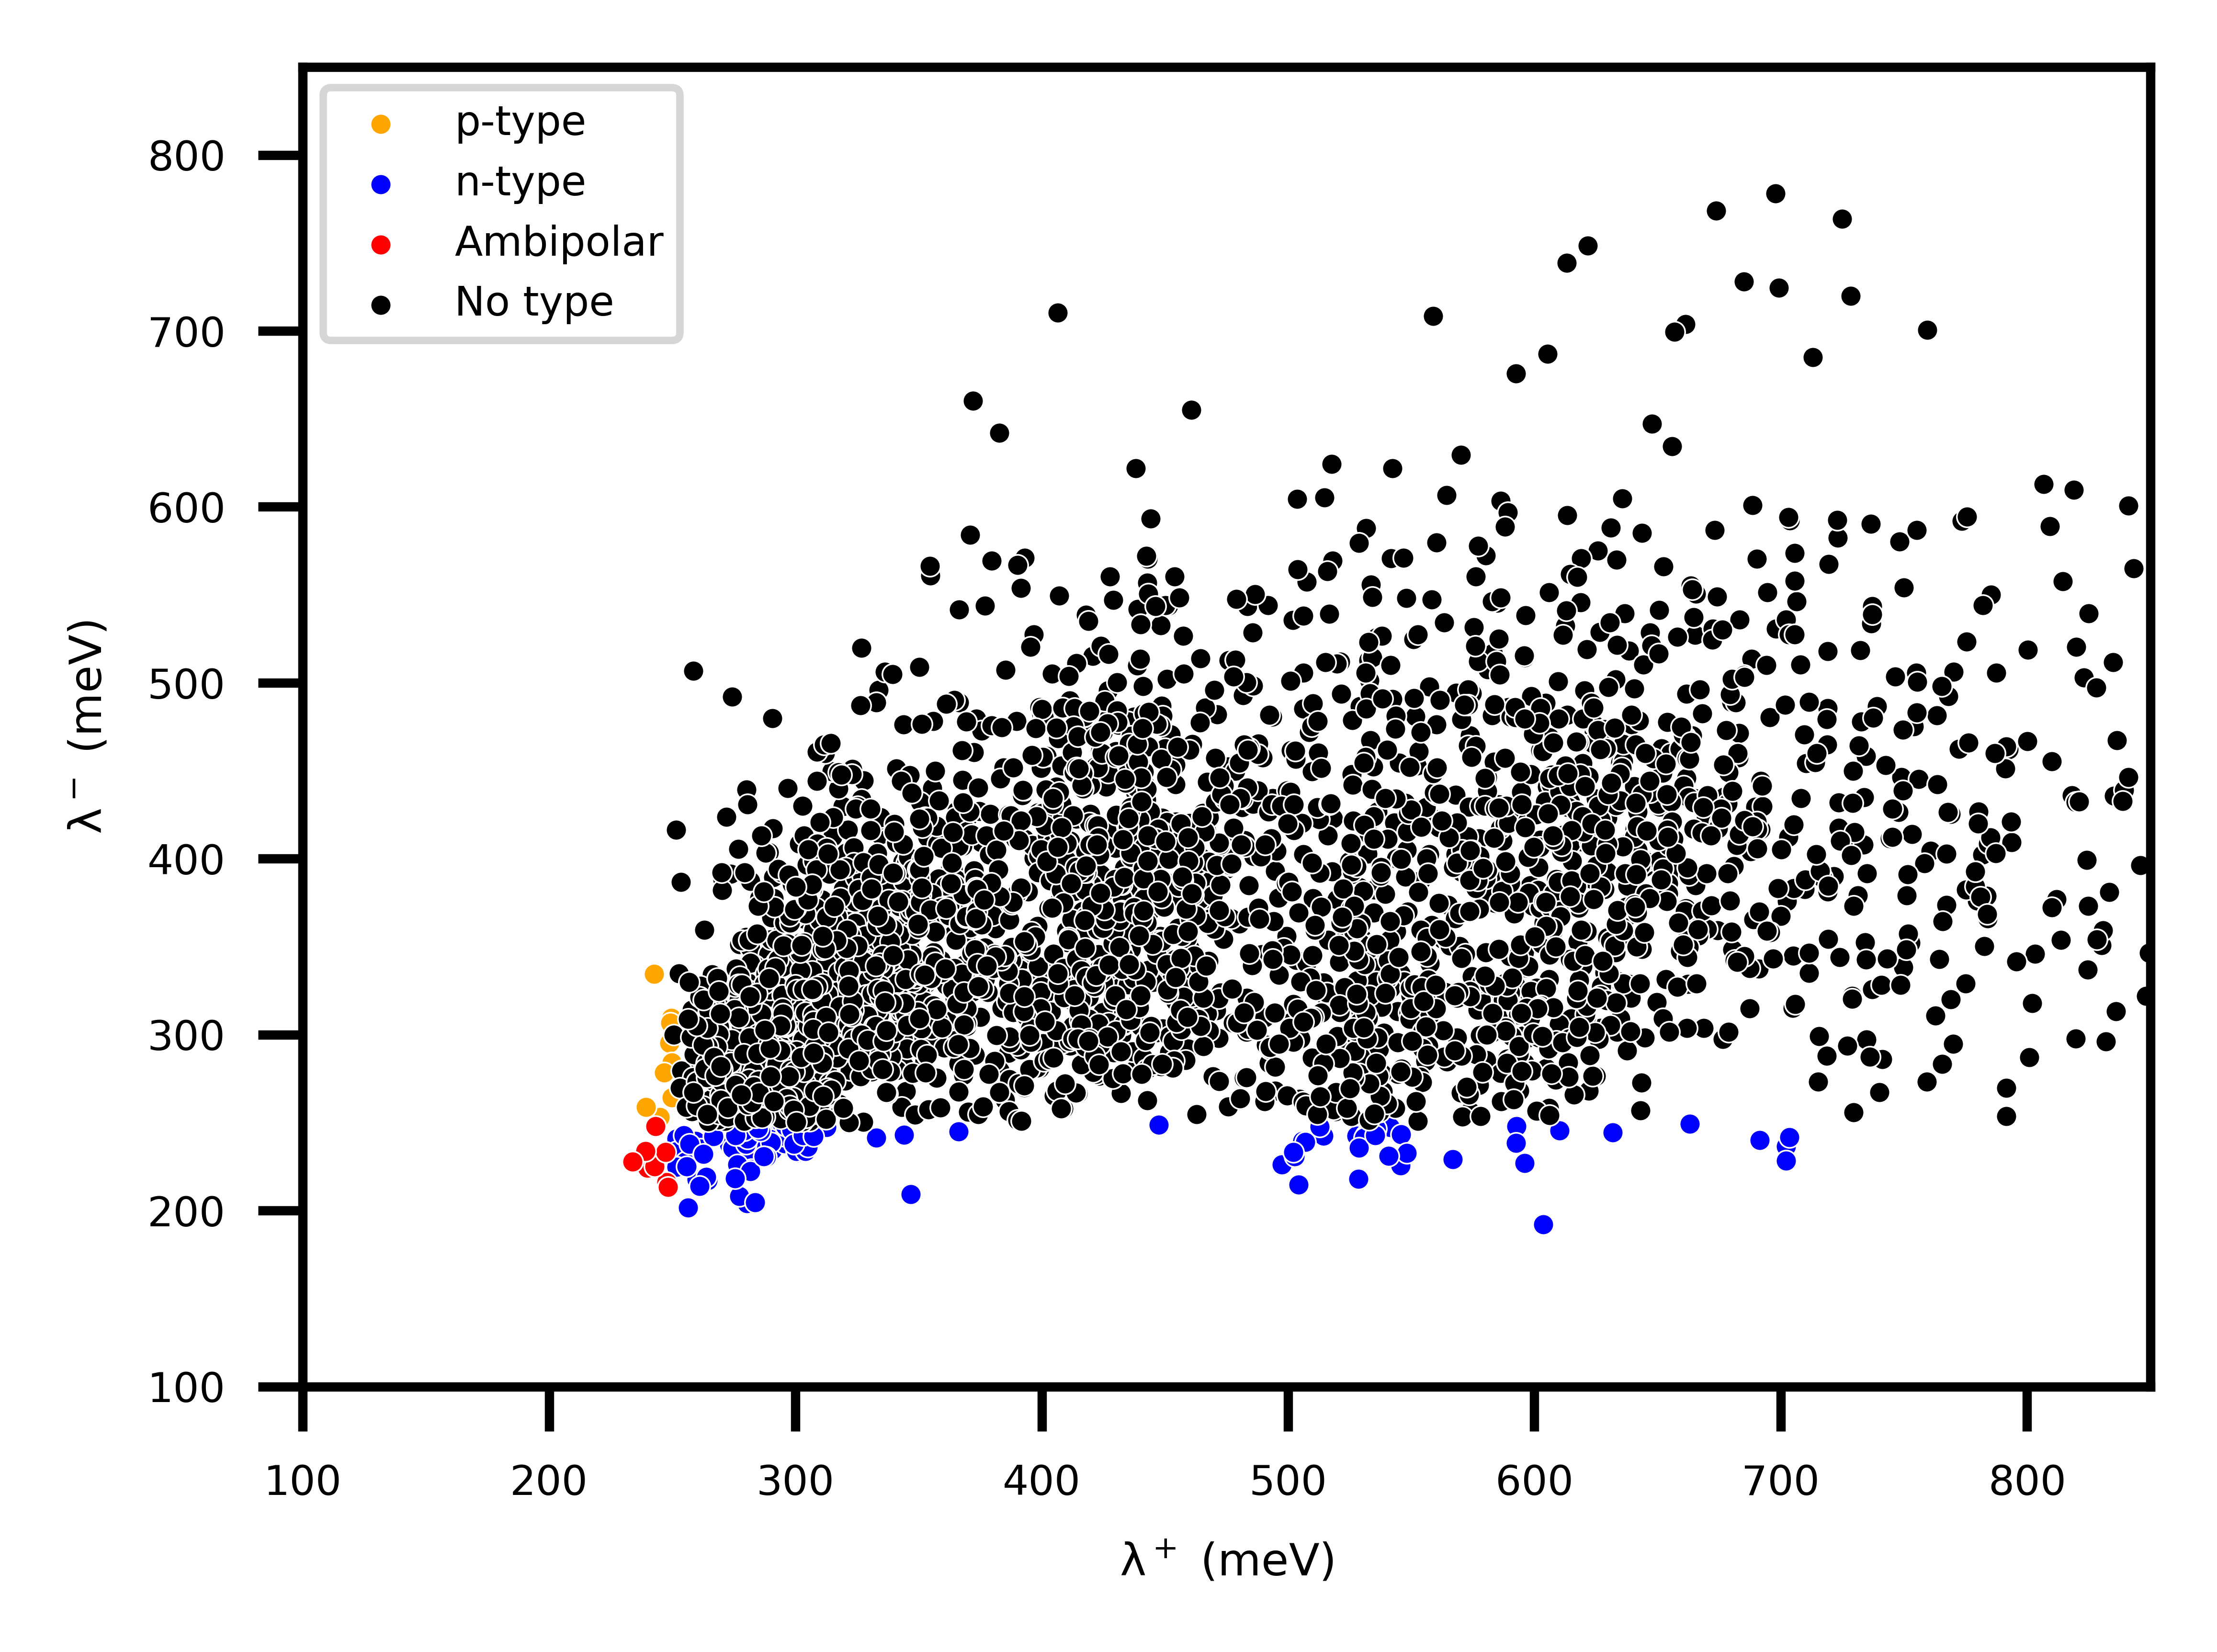

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(width, height), dpi=1400)
axes1 = fig.add_axes([0.1,0.1,1,1])
sns.set_context("paper", font_scale=0.5)

sns.scatterplot(ax=axes1,data=p_type_final,x='Cationic Reorganisation Energy /eV',y='Anionic Reorganisation Energy /eV', color='Orange', marker='o', s=5, label='p-type')
sns.scatterplot(ax=axes1,data=n_type_final,x='Cationic Reorganisation Energy /eV',y='Anionic Reorganisation Energy /eV', color='Blue', marker='o', s=5, label='n-type')
sns.scatterplot(ax=axes1,data=ambipolar_type_final,x='Cationic Reorganisation Energy /eV',y='Anionic Reorganisation Energy /eV', color='Red', marker='o', s=5, label='Ambipolar')
sns.scatterplot(ax=axes1,data=rubbish_final,x='Cationic Reorganisation Energy /eV',y='Anionic Reorganisation Energy /eV', color='Black', marker='o', s=5, label='No type')
#axes1.set_title('λ-Cation (λ$^+$) vs λ-Anion (λ$^-$)', fontsize='18')
axes1.set_xlabel('λ$^+$ (meV)')
axes1.set_ylabel('λ$^-$ (meV)')
plt.ylim(100, 850)
plt.xlim(100, 850)
#h.ax_joint.add_patch(plt.Rectangle((0.82, 1.5), 1.5, 2.5, edgecolor='black', linestyle='dotted', facecolor='grey', alpha=0.5))

# Save the figure using the fig object
fig.set_size_inches(width, height)
fig.savefig('reorg_paper_size.png', bbox_inches='tight', dpi=1400)
plt.show()